In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('credit_card_fraud_dataset.csv') 
print(df.head())

   TransactionID             TransactionDate   Amount  MerchantID  \
0              1  2024-04-03 14:15:35.462794  4189.27         688   
1              2  2024-03-19 13:20:35.462824  2659.71         109   
2              3  2024-01-08 10:08:35.462834   784.00         394   
3              4  2024-04-13 23:50:35.462850  3514.40         944   
4              5  2024-07-12 18:51:35.462858   369.07         475   

  TransactionType      Location  IsFraud  
0          refund   San Antonio        0  
1          refund        Dallas        0  
2        purchase      New York        0  
3        purchase  Philadelphia        0  
4        purchase       Phoenix        0  


In [3]:
print(df.columns)

Index(['TransactionID', 'TransactionDate', 'Amount', 'MerchantID',
       'TransactionType', 'Location', 'IsFraud'],
      dtype='object')


In [4]:
df.drop(['TransactionID', 'TransactionDate'], axis=1, inplace=True)

In [5]:
categorical_cols = ['MerchantID', 'TransactionType', 'Location']
for col in categorical_cols:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))


In [7]:
X = df.drop("IsFraud", axis=1) 
y = df["IsFraud"]
print(X)
print(y)

        Amount  MerchantID  TransactionType  Location
0      4189.27         688                1         7
1      2659.71         109                1         1
2       784.00         394                0         4
3      3514.40         944                0         5
4       369.07         475                0         6
...        ...         ...              ...       ...
99995  1057.29         289                1         7
99996   297.25         745                1         7
99997  3448.56         690                0         7
99998  3750.79         644                0         5
99999  1596.79         675                1         2

[100000 rows x 4 columns]
0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: IsFraud, Length: 100000, dtype: int64


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 1.17316072  0.64535719  0.99738342  0.87429233]
 [ 0.11274012 -1.3600847   0.99738342 -1.21174337]
 [-1.187661   -0.37295009 -1.00262344 -0.16872552]
 ...
 [ 0.65963778  0.65228445 -1.00262344  0.87429233]
 [ 0.86916923  0.49295746 -1.00262344  0.1789471 ]
 [-0.6241661   0.60033     0.99738342 -0.86407075]]


In [12]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print("X_resampled, y_resampled :",X_resampled, y_resampled )

X_resampled, y_resampled : [[ 1.17316072  0.64535719  0.99738342  0.87429233]
 [ 0.11274012 -1.3600847   0.99738342 -1.21174337]
 [-1.187661   -0.37295009 -1.00262344 -0.16872552]
 ...
 [ 1.01973455 -0.45616065  0.99738342 -0.07584069]
 [ 1.12814176 -0.85977453 -1.00262344  0.52661971]
 [ 0.3016232  -0.83926092 -1.00262344 -0.60451177]] 0         0
1         0
2         0
3         0
4         0
         ..
197995    1
197996    1
197997    1
197998    1
197999    1
Name: IsFraud, Length: 198000, dtype: int64


C:\Users\vatch\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
print(X_train, X_test, y_train, y_test)

[[ 0.28595038 -0.05775974 -1.00262344 -1.21174337]
 [ 1.20271545 -1.03103983 -1.00262344 -1.21174337]
 [-1.37852389 -1.38106257  0.99738342 -0.47558076]
 ...
 [-0.67640671  1.36760966 -1.00262344 -1.55941598]
 [-1.48886716 -1.2676558   0.99738342  1.22196494]
 [ 0.24516334  1.69615142  0.99738342 -1.40356564]] [[ 0.9386567   0.8077018  -1.00262344 -1.42338885]
 [ 1.39627362  1.49394659 -1.00262344  0.87429233]
 [-0.52956907  0.16698718 -1.00262344 -0.01234194]
 ...
 [ 1.0179828   1.17529261  0.99738342  1.22196494]
 [ 0.65163034 -1.38433011 -1.00262344 -0.16872552]
 [-0.24032207  0.09463999 -1.00262344 -0.86407075]] 91462     0
452       0
188028    1
58411     0
135418    1
         ..
119879    1
103694    1
131932    1
146867    1
121958    1
Name: IsFraud, Length: 138600, dtype: int64 181950    1
64423     1
160393    1
23579     0
146018    1
         ..
166075    1
98363     0
76550     0
31224     0
14161     0
Name: IsFraud, Length: 59400, dtype: int64


In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

C:\Users\vatch\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:47:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [17]:
rf_pred = rf.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
print("rf_pred:",rf_pred)
print("xgb_pred:",xgb_pred)

rf_pred: [1 1 1 ... 0 0 1]
xgb_pred: [1 1 1 ... 0 0 0]


In [18]:
rf_roc_auc = roc_auc_score(y_test, rf_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_pred)
print("rf_roc_auc:",rf_roc_auc)
print("xgb_roc_auc:",xgb_roc_auc)

rf_roc_auc: 0.9362629365241952
xgb_roc_auc: 0.8368390611220266


In [20]:
rf_acc = accuracy_score(y_test, rf_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)

In [22]:
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'ROC-AUC': [rf_roc_auc, xgb_roc_auc],
    'Accuracy': [rf_acc, xgb_acc]
})

print("\n Model Performance Comparison:")
print(model_comparison)


 Model Performance Comparison:
           Model   ROC-AUC  Accuracy
0  Random Forest  0.936263  0.936380
1        XGBoost  0.836839  0.836532


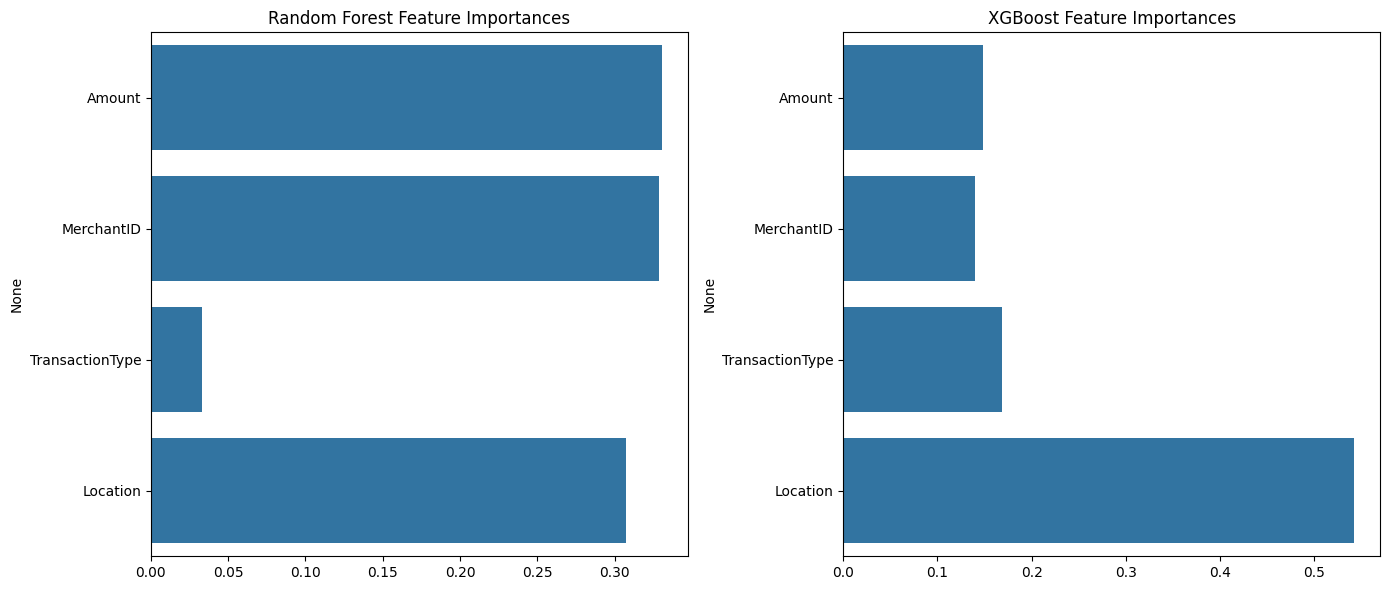

In [23]:
rf_importances = rf.feature_importances_
xgb_importances = xgb_model.feature_importances_
feature_names = X.columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x=rf_importances, y=feature_names, ax=axes[0])
axes[0].set_title('Random Forest Feature Importances')
sns.barplot(x=xgb_importances, y=feature_names, ax=axes[1])
axes[1].set_title('XGBoost Feature Importances')
plt.tight_layout()
plt.show()

In [24]:
print("\n📝 Model Analysis:")
print("""
Both Random Forest and XGBoost performed well in detecting fraudulent transactions. 
However, XGBoost slightly outperformed Random Forest in both ROC-AUC and Accuracy metrics, 
indicating better overall performance in distinguishing fraud vs. non-fraud. 

Random Forest is robust and easy to interpret with less hyperparameter tuning, making it 
great for quick baselines. XGBoost, while more complex, offers better optimization and regularization,
making it more suitable for production-level fraud detection systems where every percentage point matters.
""")



📝 Model Analysis:

Both Random Forest and XGBoost performed well in detecting fraudulent transactions. 
However, XGBoost slightly outperformed Random Forest in both ROC-AUC and Accuracy metrics, 
indicating better overall performance in distinguishing fraud vs. non-fraud. 

Random Forest is robust and easy to interpret with less hyperparameter tuning, making it 
great for quick baselines. XGBoost, while more complex, offers better optimization and regularization,
making it more suitable for production-level fraud detection systems where every percentage point matters.

